In [1]:
import numpy as np
from numpy.linalg import svd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(linewidth=np.inf)

In [2]:
X, y = load_breast_cancer(return_X_y=True)

print(X.shape)

(569, 30)


In [3]:
"""PCA by numpy SVD"""

centered_X = X - X.mean(axis=0)  # We should use centered matrix
U, S, Vt = svd(centered_X)  
PC_svd = centered_X.dot(Vt.T)

print(PC_svd)  # Columns are principal components

[[-1.16014257e+03 -2.93917544e+02 -4.85783976e+01 ... -1.29334919e-03 -1.98910417e-03  7.04378359e-04]
 [-1.26912244e+03  1.56301818e+01  3.53945342e+01 ...  1.34685217e-03 -6.85925212e-04 -1.06125086e-03]
 [-9.95793889e+02  3.91567432e+01  1.70975298e+00 ... -1.84867758e-05  7.75218581e-04  4.05360270e-04]
 ...
 [-3.14501756e+02  4.75535252e+01  1.04424072e+01 ... -2.54369638e-05 -4.83858890e-04 -2.85342703e-04]
 [-1.12485812e+03  3.41292250e+01  1.97420874e+01 ... -1.23547951e-03  8.08728730e-04  1.21655195e-03]
 [ 7.71527622e+02 -8.86431064e+01 -2.38890319e+01 ...  4.44552928e-03 -2.42876427e-04  1.46800350e-03]]


In [4]:
"""PCA by sklearn PCA class"""

PC_pca = PCA().fit_transform(X)  # Don't have to use centered matrix

print(PC_pca)

[[ 1.16014257e+03 -2.93917544e+02  4.85783976e+01 ...  1.29334919e-03  1.98910417e-03  7.04378359e-04]
 [ 1.26912244e+03  1.56301818e+01 -3.53945342e+01 ... -1.34685217e-03  6.85925212e-04 -1.06125086e-03]
 [ 9.95793889e+02  3.91567432e+01 -1.70975298e+00 ...  1.84867758e-05 -7.75218581e-04  4.05360270e-04]
 ...
 [ 3.14501756e+02  4.75535252e+01 -1.04424072e+01 ...  2.54369638e-05  4.83858890e-04 -2.85342703e-04]
 [ 1.12485812e+03  3.41292250e+01 -1.97420874e+01 ...  1.23547951e-03 -8.08728730e-04  1.21655195e-03]
 [-7.71527622e+02 -8.86431064e+01  2.38890319e+01 ... -4.44552928e-03  2.42876427e-04  1.46800350e-03]]


- Principal components from both methods are **same**. (except the signs, because the signs of eigenvectors are arbitrary)
- PCA class in scikit-learn first centers the data and applies **SVD** (`scipy.linalg.svd`)

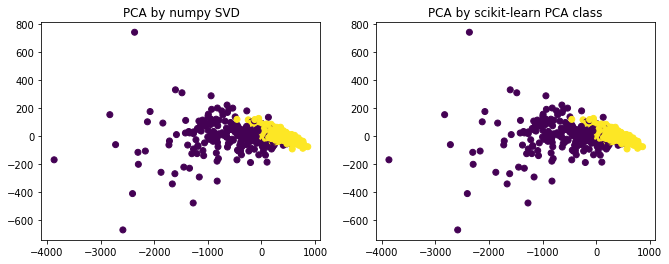

In [5]:
fig = plt.figure(figsize=(11, 4))

ax1 = fig.add_subplot(121)
ax1.scatter(PC_svd[:, 0], PC_svd[:, 1], c=y)
ax1.set_title("PCA by numpy SVD")

ax2 = fig.add_subplot(122)
ax2.scatter(-PC_pca[:, 0], PC_pca[:, 1], c=y)  # Reversed the sign of PC1
ax2.set_title("PCA by scikit-learn PCA class")
plt.show()

- PCA class가 알아서 centering은 해주긴 하지만, normalize는 안 해줌.
- Raw data를 그냥 넣으면 위처럼 PC의 스케일이 매우 크니, 미리 normalize를 해주고 넣는 게 좋아보임.

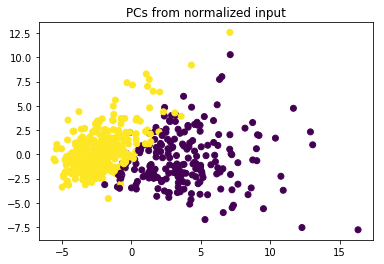

In [6]:
from sklearn.preprocessing import StandardScaler

PC = PCA().fit_transform(StandardScaler().fit_transform(X))

plt.figure()
plt.title("PCs from normalized input")
plt.scatter(PC[:, 0], PC[:, 1], c=y)
plt.show()